In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Yeast\Yeast_AN_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.43,NaN,NaN,NaN,0.5,NaN,0.53,0.22
2,0.64,NaN,NaN,0.15,0.5,0.0,NaN,NaN
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,NaN,NaN,NaN,0.5,0.0,0.48,NaN
...,...,...,...,...,...,...,...,...
1479,0.82,NaN,NaN,0.18,0.5,0.0,NaN,NaN
1480,0.35,0.29,0.46,0.14,0.5,0.0,0.54,0.66
1481,0.41,0.47,0.50,0.14,0.5,0.0,0.53,0.37
1482,NaN,0.45,NaN,NaN,0.5,0.0,0.59,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	148
float64		column 2	185
float64		column 3	259
float64		column 4	222
float64		column 5	74
float64		column 6	37
float64		column 7	111
float64		column 8	148


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,1336.000000,1299.000000,1225.0000,1262.000000,1410.000000,1447.000000,1373.000000,1336.000000
mean,0.500741,0.497675,0.5000,0.260388,0.504255,0.007118,0.500655,0.275689
std,0.137737,0.123067,0.0853,0.137035,0.045946,0.073519,0.057547,0.106863
min,0.110000,0.130000,0.2100,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.4600,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.5100,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.5500,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.0000,1.000000,1.000000,0.830000,0.730000,1.000000


<AxesSubplot:>

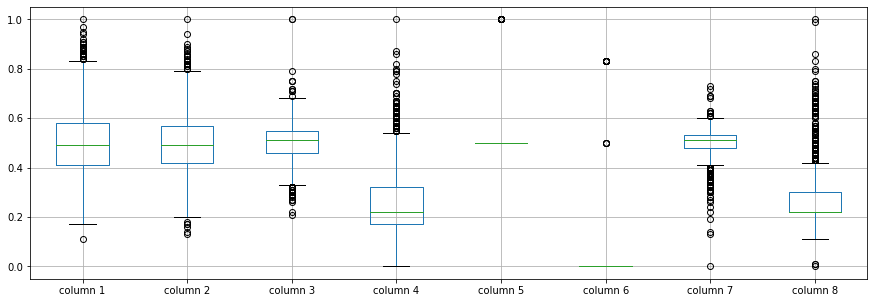

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.500741
column 2    0.497675
column 3    0.500000
column 4    0.260388
column 5    0.504255
column 6    0.007118
column 7    0.500655
column 8    0.275689
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.581596,-0.158458,0.156797,0.066904,0.022965,0.047937,-0.114226
column 2,0.581596,1.000000,-0.258625,0.145426,0.055733,-0.009747,0.081079,-0.119242
column 3,-0.158458,-0.258625,1.000000,0.061898,-0.036847,0.001135,-0.171725,-0.037538
column 4,0.156797,0.145426,0.061898,1.000000,-0.020176,0.003644,-0.107993,-0.055037
column 5,0.066904,0.055733,-0.036847,-0.020176,1.000000,-0.008196,0.039436,-0.023298
column 6,0.022965,-0.009747,0.001135,0.003644,-0.008196,1.000000,0.014669,-0.032252
column 7,0.047937,0.081079,-0.171725,-0.107993,0.039436,0.014669,1.000000,0.069853
column 8,-0.114226,-0.119242,-0.037538,-0.055037,-0.023298,-0.032252,0.069853,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+78,8+78+78,8+78+78+78,8+78+78+78+78,8+78+78+78+78+78,8+78+78+78+78+78+78,8+78+78+78+78+78,8+78+78+78+78,8+78+78+78,8+78+78,8+78,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 2.5137718488340792
Epoch: 1 , loss: 2.1458891682002856
Epoch: 2 , loss: 1.9901726945586826
Epoch: 3 , loss: 1.8542938400869784
Epoch: 4 , loss: 1.7369760832060939
Epoch: 5 , loss: 1.67488947381144
Epoch: 6 , loss: 1.6017004005287006
Epoch: 7 , loss: 1.5412332337835561
Epoch: 8 , loss: 1.4506502216276915
Epoch: 9 , loss: 1.4352242130300272
Epoch: 10 , loss: 1.374849550102068
Epoch: 11 , loss: 1.3318656721840734
Epoch: 12 , loss: 1.3037263187377348
Epoch: 13 , loss: 1.2611607358507488
Epoch: 14 , loss: 1.2229662978130837
Epoch: 15 , loss: 1.2144947337067646
Epoch: 16 , loss: 1.1726980261180713
Epoch: 17 , loss: 1.18152623915154
Epoch: 18 , loss: 1.1338983022648355
Epoch: 19 , loss: 1.1065938641195712
Epoch: 20 , loss: 1.1014943116385003
Epoch: 21 , loss: 1.0921776229920594
Epoch: 22 , loss: 1.0760186554297158
Epoch: 23 , loss: 1.0569690375224403
Epoch: 24 , loss: 1.0589311919782474
Epoch: 25 , loss: 1.034

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(1484, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.43
column 2    0.44
column 3    0.48
column 4    0.22
column 5    0.50
column 6    0.00
column 7    0.51
column 8    0.22
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Yeast.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.00000,-0.157888,0.028417,-0.010901,0.0,-0.000026,0.000000,0.000000
2,0.00000,-0.348601,-0.212407,0.000000,0.0,0.000000,-0.241171,-0.045743
3,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,0.00000,0.207218,0.159219,-0.212497,0.0,0.000000,0.000000,0.119617
...,...,...,...,...,...,...,...,...
1479,0.00000,-0.157161,-0.004034,0.000000,0.0,0.000000,-0.032056,0.037900
1480,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1481,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1482,-0.00809,0.000000,-0.112153,0.010191,0.0,0.000000,0.000000,0.058739


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(5.44618867823186, 46.90414374018569)

In [17]:
NRMS=numerator/denominator
NRMS


0.11611316706685283

In [18]:
new_df.iloc[66,:]

column 1    0.46
column 2    0.49
column 3    0.58
column 4    0.23
column 5    0.50
column 6    0.00
column 7    0.44
column 8    0.22
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58000,0.610000,0.470000,0.130000,0.5,0.000000,0.480000,0.220000
1,0.43000,0.512112,0.508417,0.259099,0.5,-0.000026,0.530000,0.220000
2,0.64000,0.271399,0.277593,0.150000,0.5,0.000000,0.288829,0.174257
3,0.58000,0.440000,0.570000,0.130000,0.5,0.000000,0.540000,0.220000
4,0.42000,0.647218,0.639219,0.327503,0.5,0.000000,0.480000,0.339617
...,...,...,...,...,...,...,...,...
1479,0.82000,0.472839,0.465966,0.180000,0.5,0.000000,0.467944,0.257900
1480,0.35000,0.290000,0.460000,0.140000,0.5,0.000000,0.540000,0.660000
1481,0.41000,0.470000,0.500000,0.140000,0.5,0.000000,0.530000,0.370000
1482,0.50191,0.450000,0.507847,0.260191,0.5,0.000000,0.590000,0.278739


In [ ]:
imputations[-1].to_excel("Yeast_AN_10(imp).xlsx", index=False, header=False)